In [884]:
from IPython.core.debugger import set_trace

%load_ext nb_black
%matplotlib inline

# import pandas as pd
# import numpy as np
# import os
# import matplotlib.pyplot as plt
# import time

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from pathlib import Path

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

np.random.seed(42)
tf.random.set_seed(42)

plt.style.use(style="seaborn")
# plt.rcParams['figure.dpi'] = 400
sns.set_style('whitegrid')


The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [885]:
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
if gpu_devices:
    print('Using GPU')
    tf.config.experimental.set_memory_growth(gpu_devices[0], True)
else:
    print('Using CPU')

Using GPU


<IPython.core.display.Javascript object>

In [886]:
!nvidia-smi

Sun Jul 10 02:37:05 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.48.07    Driver Version: 516.40       CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:01:00.0  On |                  N/A |
|  0%   57C    P8    18W / 200W |   2689MiB /  4096MiB |      7%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

<IPython.core.display.Javascript object>

In [887]:
# csv_path = "/app/StockPricePredictions/data/alphavantage/time_series_daily_adjusted/AAPL/AAPL_WITH_TWINT_FINBERT_SA.csv"
# csv_path = "/app/StockPricePredictions/data/alphavantage/time_series_daily_adjusted/AMZN/AMZN_WITH_TWINT_FINBERT_SA.csv"

csv_path = "/app/StockPricePredictions/data/alphavantage/time_series_daily_adjusted/MSFT/MSFT_WITH_TWINT_FINBERT_SA.csv"

<IPython.core.display.Javascript object>

In [888]:
df = pd.read_csv(csv_path)
df.sort_values(by=["date"], ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)
# Slice [start:stop:step], starting from index 5 take every 6th record.
# df = df[5::6]

date_time = pd.to_datetime(df.pop('date'))
# title = df.pop('tweet')

# df = df[["increase", "log_return", "positive"]]  

df.index = date_time

<IPython.core.display.Javascript object>

In [889]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3064 entries, 2010-01-04 to 2022-03-04
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   1. open               3064 non-null   float64
 1   2. high               3064 non-null   float64
 2   3. low                3064 non-null   float64
 3   4. close              3064 non-null   float64
 4   5. adjusted close     3064 non-null   float64
 5   6. volume             3064 non-null   float64
 6   7. dividend amount    3064 non-null   float64
 7   8. split coefficient  3064 non-null   float64
 8   date_time             3064 non-null   object 
 9   day_of_week           3064 non-null   int64  
 10  return                3064 non-null   float64
 11  increase              3064 non-null   float64
 12  log_return            3064 non-null   float64
 13  negative              3064 non-null   float64
 14  nuetral               3064 non-null   float64
 15  pos

<IPython.core.display.Javascript object>

In [890]:
df.describe()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient,day_of_week,return,increase,log_return,negative,nuetral,positive
count,3064.000000,3064.000000,3064.000000,3064.000000,3064.000000,3.064000e+03,3064.000000,3064.0,3064.000000,3064.000000,3064.000000,3064.000000,3064.000000,3064.000000,3064.000000
mean,89.108658,89.941401,88.235320,89.135199,84.711218,3.850385e+07,0.005597,1.0,2.022846,0.000941,0.524804,0.000815,0.113837,0.668409,0.149216
std,79.912787,80.696880,79.067978,79.924677,81.182964,2.186157e+07,0.047356,0.0,1.399408,0.015854,0.499466,0.015857,0.170261,0.267734,0.149886
min,23.090000,23.320000,22.730000,23.010000,17.899248,7.425503e+06,0.000000,1.0,0.000000,-0.147390,0.000000,-0.159453,0.000000,0.000000,0.000000
25%,30.982500,31.240000,30.710000,30.997250,25.351937,2.390472e+07,0.000000,1.0,1.000000,-0.006695,0.000000,-0.006717,0.021269,0.562505,0.044797
50%,51.995000,52.440000,51.475000,52.077500,47.272908,3.278814e+07,0.000000,1.0,2.000000,0.000684,1.000000,0.000684,0.039156,0.750256,0.096959
75%,113.005000,113.707500,111.762500,112.850000,108.891906,4.780218e+07,0.000000,1.0,3.000000,0.008862,1.000000,0.008823,0.131506,0.877146,0.210162
max,344.620000,349.670000,342.200000,343.110000,342.401190,3.193179e+08,0.620000,1.0,4.000000,0.142169,1.000000,0.132929,0.973686,0.950961,0.951188


<IPython.core.display.Javascript object>

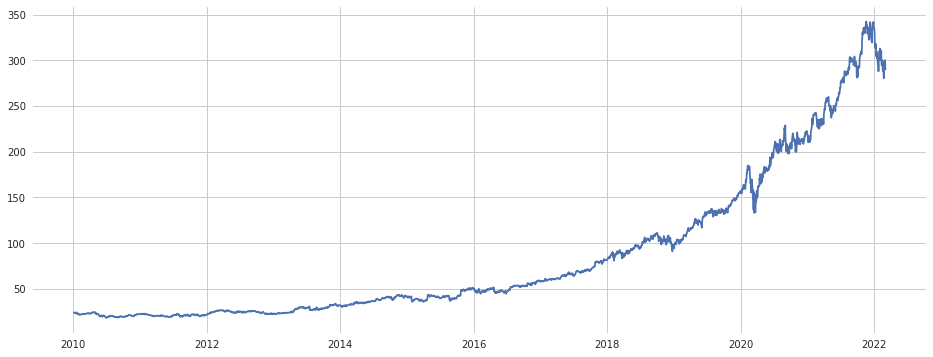

<IPython.core.display.Javascript object>

In [891]:
plt.figure(1, figsize=(16, 6))
_ = plt.plot(df['5. adjusted close'])

Calculate the percentage change.

The reason for using pct_change instead of the prices is the benefit of normalization as we can measure all variables in a comparable metric. Also returns have more manageable statistical properties than prices such as stationarity, as in most cases we don't have stationary prices but we can have stationary returns.

A stationary time series is one where statistical properties such as mean, variance, correlation, etc are constant over time.
For more details on stationarity: https://en.wikipedia.org/wiki/Stationary_process

Calculate the log returns.

Why use log returns: https://quantivity.wordpress.com/2011/02/21/why-log-returns/

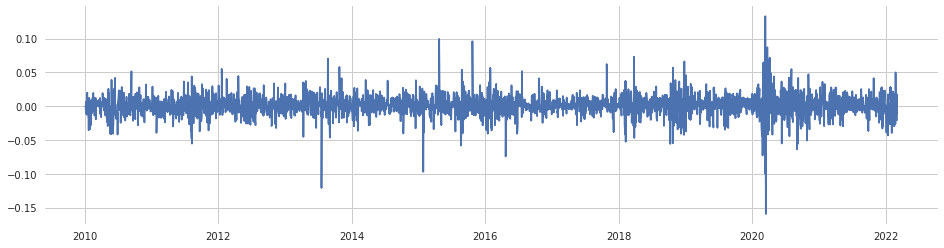

<IPython.core.display.Javascript object>

In [892]:
plt.figure(1, figsize=(16, 4))
plt.plot(df.log_return)

In [893]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3064 entries, 2010-01-04 to 2022-03-04
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   1. open               3064 non-null   float64
 1   2. high               3064 non-null   float64
 2   3. low                3064 non-null   float64
 3   4. close              3064 non-null   float64
 4   5. adjusted close     3064 non-null   float64
 5   6. volume             3064 non-null   float64
 6   7. dividend amount    3064 non-null   float64
 7   8. split coefficient  3064 non-null   float64
 8   date_time             3064 non-null   object 
 9   day_of_week           3064 non-null   int64  
 10  return                3064 non-null   float64
 11  increase              3064 non-null   float64
 12  log_return            3064 non-null   float64
 13  negative              3064 non-null   float64
 14  nuetral               3064 non-null   float64
 15  pos

<IPython.core.display.Javascript object>

In [894]:
feature_list = ["increase", "log_return", "positive"]

X = df[feature_list].values



<IPython.core.display.Javascript object>

In [895]:
from sklearn.preprocessing import MinMaxScaler

<IPython.core.display.Javascript object>

In [896]:
scaler = MinMaxScaler(feature_range=(0, 1)).fit(X)
X_scaled = scaler.transform(X)

<IPython.core.display.Javascript object>

In [897]:
y = [x[0] for x in X_scaled]

<IPython.core.display.Javascript object>

#### Train test split

In [898]:
split = int(len(X_scaled) * 0.9)
print(split)

2757


<IPython.core.display.Javascript object>

In [899]:
X_train = X_scaled[:split]
X_test = X_scaled[split : len(X_scaled)]
y_train = y[:split]
y_test = y[split : len(y)]

<IPython.core.display.Javascript object>

In [900]:
print(len(X_train))
print(len(X_test))

2757
307


<IPython.core.display.Javascript object>

In [901]:
assert len(X_train) == len(y_train)
assert len(X_test) == len(y_test)

<IPython.core.display.Javascript object>

#### Labeling

We want to predict the stock price at a future time. We'll predict the stock price at time t + 1 relative to the stock price at time t.

As we're going to use an LSTM architecture, we know that it has memory and that it is maintained by setting the time step, basically how many steps in the past we want the LSTM to use.

The time step  refers to how many steps in time we want the backpropagation algorithm to use when calculating gradients for weight updates during training.

So we can use a method to create both the timestep and the output variable, the t + 1.

In [902]:
n = 63
Xtrain = []
ytrain = []
Xtest = []
ytest = []
for i in range(n, len(X_train)):
    Xtrain.append(X_train[i - n : i, : X_train.shape[1]])
    ytrain.append(y_train[i])  # predict next record
for i in range(n, len(X_test)):
    Xtest.append(X_test[i - n : i, : X_test.shape[1]])
    ytest.append(y_test[i])  # predict next record

<IPython.core.display.Javascript object>

In [903]:
df.head(5)

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient,date_time,day_of_week,return,increase,log_return,negative,nuetral,positive
date,,,,,,,,,,,,,,,,
2010-01-04,30.62,31.10,30.59,30.950,23.857347,38409100.0,0.0,1.0,2010-01-04,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
2010-01-05,30.85,31.10,30.64,30.960,23.865055,49749600.0,0.0,1.0,2010-01-05,1,0.000323,1.0,0.000323,0.000000,0.000000,0.000000
2010-01-06,30.88,31.08,30.52,30.770,23.718596,58182400.0,0.0,1.0,2010-01-06,2,-0.006137,0.0,-0.006156,0.000000,0.000000,0.000000
2010-01-07,30.63,30.70,30.19,30.452,23.473471,50559700.0,0.0,1.0,2010-01-07,3,-0.010335,0.0,-0.010389,0.000000,0.000000,0.000000
2010-01-08,30.28,30.88,30.24,30.660,23.633805,51197400.0,0.0,1.0,2010-01-08,4,0.006830,1.0,0.006807,0.466942,0.512062,0.020996


<IPython.core.display.Javascript object>

In [904]:
ytrain[0]

1.0

<IPython.core.display.Javascript object>

In [905]:
len(feature_list)

3

<IPython.core.display.Javascript object>

In [906]:
_ = np.array(ytrain[0])

if len(feature_list) == 1:
    _ = np.c_[_]

elif len(feature_list) == 2:
    _ = np.c_[_, np.zeros(_.shape)]

elif len(feature_list) == 3:
    _ = np.c_[_, np.zeros(_.shape), np.zeros(_.shape)]

<IPython.core.display.Javascript object>

In [907]:
scaler.inverse_transform(_)

array([[ 1.        , -0.15945339,  0.        ]])

<IPython.core.display.Javascript object>

In an LSTM network the input for each LSTM layer needs to contain the following information:
- The number of observations
- The time steps
- The features

Therefore we need to add a temporal dimension compared to a classical network:

(number of observations, number of steps, number of features per step)

In [908]:
Xtrain, ytrain = (np.array(Xtrain), np.array(ytrain))
Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], Xtrain.shape[2]))

Xtest, ytest = (np.array(Xtest), np.array(ytest))
Xtest = np.reshape(Xtest, (Xtest.shape[0], Xtest.shape[1], Xtest.shape[2]))

<IPython.core.display.Javascript object>

In [909]:
print(Xtrain.shape)
print(ytrain.shape)
print("---")
print(Xtest.shape)
print(ytest.shape)

(2694, 63, 3)
(2694,)
---
(244, 63, 3)
(244,)


<IPython.core.display.Javascript object>

#### LSTM Model

In [910]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

<IPython.core.display.Javascript object>

In [911]:
results_path = Path('results', 'lstm')
if not results_path.exists():
    results_path.mkdir(parents=True)

<IPython.core.display.Javascript object>

In [912]:
# MAX_EPOCHS = 500
MAX_EPOCHS = 100
# patience=50
patience=30

lstm_path = (results_path / 'lstm.h5').as_posix()
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath=lstm_path,
                               verbose=1,
                               monitor='val_loss',
                               save_best_only=True)

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
    decay_rate=0.9)

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01,
                                     # learning_rate=lr_schedule,
                                     rho=0.9,
                                     epsilon=1e-08,
                                     decay=0.0)

# optimizer = tf.keras.optimizers.Adam()

def compile_and_fit(model, patience=patience):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min',  
                                                    restore_best_weights=True)

  model.compile(# loss=tf.losses.BinaryCrossentropy(from_logits=True),
                loss=tf.losses.BinaryCrossentropy(),
                optimizer=optimizer,
                metrics=[tf.metrics.BinaryAccuracy()])

  history = model.fit(Xtrain, ytrain, epochs=MAX_EPOCHS,
                      validation_data=(Xtest, ytest),
                      callbacks=[early_stopping, checkpointer],
                      batch_size=32,
                      shuffle=True,
                      verbose=1)
  return history


<IPython.core.display.Javascript object>

In [913]:
from keras.layers import Dropout, Dense

<IPython.core.display.Javascript object>

In [914]:
model = Sequential([
    LSTM(units=64, 
         return_sequences=False,
         # Shape => [batch, time, features]
         input_shape=(Xtrain.shape[1], Xtrain.shape[2]), 
         name='LSTM'),
    # Dropout(0.20),
    # Dense(10, activation='relu'),
    Dense(1, activation='sigmoid', name='Output')
    # Dense(1, name='Output')
])

<IPython.core.display.Javascript object>

In [915]:
history = compile_and_fit(model)


Epoch 1/100
83/85 [============================>.] - ETA: 0s - loss: 0.7069 - binary_accuracy: 0.5045
Epoch 1: val_loss improved from inf to 0.69396, saving model to results/lstm/lstm.h5
85/85 [==============================] - 7s 59ms/step - loss: 0.7065 - binary_accuracy: 0.5071 - val_loss: 0.6940 - val_binary_accuracy: 0.5164
Epoch 2/100
84/85 [============================>.] - ETA: 0s - loss: 0.6937 - binary_accuracy: 0.5141
Epoch 2: val_loss improved from 0.69396 to 0.69344, saving model to results/lstm/lstm.h5
85/85 [==============================] - 2s 18ms/step - loss: 0.6937 - binary_accuracy: 0.5141 - val_loss: 0.6934 - val_binary_accuracy: 0.5164
Epoch 3/100
85/85 [==============================] - ETA: 0s - loss: 0.6930 - binary_accuracy: 0.5234
Epoch 3: val_loss did not improve from 0.69344
85/85 [==============================] - 2s 22ms/step - loss: 0.6930 - binary_accuracy: 0.5234 - val_loss: 0.6940 - val_binary_accuracy: 0.5164
Epoch 4/100
84/85 [======================

<IPython.core.display.Javascript object>

In [916]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTM (LSTM)                 (None, 64)                17408     
                                                                 
 Output (Dense)              (None, 1)                 65        
                                                                 
Total params: 17,473
Trainable params: 17,473
Non-trainable params: 0
_________________________________________________________________


<IPython.core.display.Javascript object>

In [917]:
train_predict_scaled = model.predict(Xtrain).squeeze()
test_predict_scaled = model.predict(Xtest).squeeze()

print(len(train_predict_scaled))
print(len(test_predict_scaled))

2694
244


<IPython.core.display.Javascript object>

In [918]:
model.evaluate(Xtrain, ytrain)

85/85 [==============================] - 1s 8ms/step - loss: 0.6917 - binary_accuracy: 0.5200


[0.6917380690574646, 0.5200445652008057]

<IPython.core.display.Javascript object>

In [919]:
model.evaluate(Xtest, ytest)

8/8 [==============================] - 0s 10ms/step - loss: 0.6900 - binary_accuracy: 0.5451


[0.6899802684783936, 0.5450819730758667]

<IPython.core.display.Javascript object>

In [920]:
from sklearn.metrics import accuracy_score

<IPython.core.display.Javascript object>

In [921]:
# calculate mean absolute error
trainScore = accuracy_score(ytrain, train_predict_scaled.round())
print("Train Score: %.4f Accuracy" % (trainScore))

testScore = accuracy_score(ytest, test_predict_scaled.round())
print("Test Score: %.4f Accuracy" % (testScore))

Train Score: 0.5200 Accuracy
Test Score: 0.5451 Accuracy


<IPython.core.display.Javascript object>

In [922]:
_ = np.array(train_predict_scaled)

if len(feature_list) == 1:
    _ = np.c_[_]

elif len(feature_list) == 2:
    _ = np.c_[_, np.zeros(_.shape)]

elif len(feature_list) == 3:
    _ = np.c_[_, np.zeros(_.shape), np.zeros(_.shape)]

<IPython.core.display.Javascript object>

In [923]:
_train_predict_scaled = scaler.inverse_transform(_)

<IPython.core.display.Javascript object>

In [924]:
_train_predict_scaled[0][0]

0.527744710445404

<IPython.core.display.Javascript object>

In [925]:
train_predict_rescaled = np.zeros([2694,], dtype='float32')

<IPython.core.display.Javascript object>

In [926]:
for i, x in enumerate(_train_predict_scaled):
    if x[0] > .5:
        train_predict_rescaled[i] = 1
    else:
        train_predict_rescaled[i] = 0

<IPython.core.display.Javascript object>

In [927]:
train_predict_rescaled[0]

1.0

<IPython.core.display.Javascript object>

In [928]:
train_predict_rescaled = pd.Series(train_predict_rescaled, index=df.iloc[63:split].index)


<IPython.core.display.Javascript object>

In [929]:
_ = np.array(test_predict_scaled)

if len(feature_list) == 1:
    _ = np.c_[_]

elif len(feature_list) == 2:
    _ = np.c_[_, np.zeros(_.shape)]

elif len(feature_list) == 3:
    _ = np.c_[_, np.zeros(_.shape), np.zeros(_.shape)]

<IPython.core.display.Javascript object>

In [930]:
_test_predict_scaled = scaler.inverse_transform(_)

<IPython.core.display.Javascript object>

In [931]:
_test_predict_scaled[0][0]

0.45437049865722656

<IPython.core.display.Javascript object>

In [932]:
test_predict_rescaled = np.zeros([244,], dtype='float32')

<IPython.core.display.Javascript object>

In [933]:
for i, x in enumerate(_test_predict_scaled):
    if x[0] > .5:
        test_predict_rescaled[i] = 1
    else:
        test_predict_rescaled[i] = 0

<IPython.core.display.Javascript object>

In [954]:
test_predict_rescaled = pd.Series(test_predict_rescaled, index=df.iloc[split+63:].index)

<IPython.core.display.Javascript object>

In [955]:
df_compare = df.iloc[-244:].copy()

<IPython.core.display.Javascript object>

In [956]:
df_compare["preds"] = test_predict_rescaled

<IPython.core.display.Javascript object>

In [957]:
df_compare = df_compare[['5. adjusted close', 'preds', 'return', 'increase']].copy()

<IPython.core.display.Javascript object>

In [958]:
df_compare.increase.value_counts()

1.0    126
0.0    118
Name: increase, dtype: int64

<IPython.core.display.Javascript object>

In [959]:
df_compare.increase.value_counts(normalize=True)

1.0    0.516393
0.0    0.483607
Name: increase, dtype: float64

<IPython.core.display.Javascript object>

In [960]:
df_compare.preds.value_counts()

1.0    155
0.0     89
Name: preds, dtype: int64

<IPython.core.display.Javascript object>

In [961]:
df_compare.preds.value_counts(normalize=True)

1.0    0.635246
0.0    0.364754
Name: preds, dtype: float64

<IPython.core.display.Javascript object>

In [962]:
testScore = accuracy_score(df_compare["increase"].values, df_compare["preds"].values)
print("Test Score: %.4f Accuracy" % (testScore))

Test Score: 0.5451 Accuracy


<IPython.core.display.Javascript object>

In [963]:
df_compare.head()

,5. adjusted close,preds,return,increase
date,,,,
2021-03-18,228.854221,0.0,-0.026662,0.0
2021-03-19,228.487213,0.0,-0.001604,0.0
2021-03-22,234.081604,1.0,0.024484,1.0
2021-03-23,235.658746,0.0,0.006738,1.0
2021-03-24,233.555890,0.0,-0.008923,0.0


<IPython.core.display.Javascript object>

In [964]:
df_compare.tail()

,5. adjusted close,preds,return,increase
date,,,,
2022-02-28,298.79,0.0,0.004978,1.0
2022-03-01,294.95,0.0,-0.012852,0.0
2022-03-02,300.19,1.0,0.017766,1.0
2022-03-03,295.92,0.0,-0.014224,0.0
2022-03-04,289.86,0.0,-0.020479,0.0


<IPython.core.display.Javascript object>

In [965]:
df_compare["increase"] = df_compare["increase"].shift(-1)
df_compare["return"] = df_compare["return"].shift(-1)
df_compare["preds"] = df_compare["preds"].shift(-1)

<IPython.core.display.Javascript object>

In [966]:
df_compare.head()

,5. adjusted close,preds,return,increase
date,,,,
2021-03-18,228.854221,0.0,-0.001604,0.0
2021-03-19,228.487213,1.0,0.024484,1.0
2021-03-22,234.081604,0.0,0.006738,1.0
2021-03-23,235.658746,0.0,-0.008923,0.0
2021-03-24,233.555890,0.0,-0.013251,0.0


<IPython.core.display.Javascript object>

In [967]:
df_compare.tail()

,5. adjusted close,preds,return,increase
date,,,,
2022-02-28,298.79,0.0,-0.012852,0.0
2022-03-01,294.95,1.0,0.017766,1.0
2022-03-02,300.19,0.0,-0.014224,0.0
2022-03-03,295.92,0.0,-0.020479,0.0
2022-03-04,289.86,NaN,NaN,NaN


<IPython.core.display.Javascript object>

In [968]:
df_compare = df_compare.drop("2021-03-18")


<IPython.core.display.Javascript object>

### Postive Increase Prediction %

In [969]:
df_compare[(df_compare["increase"]==1) & (df_compare["preds"]==1)].shape[0] / df_compare[(df_compare["increase"]==1)].shape[0]

0.6746031746031746

<IPython.core.display.Javascript object>

### Negative Increase Prediction %

In [970]:
df_compare[(df_compare["increase"]==0) & (df_compare["preds"]==0)].shape[0] / df_compare[(df_compare["increase"]==0)].shape[0]

0.39655172413793105

<IPython.core.display.Javascript object>

### Overall Prediction Accuracy %

In [971]:
df_compare[(df_compare["increase"] == df_compare["preds"])].shape[0] / (df_compare.shape[0])

0.5390946502057613

<IPython.core.display.Javascript object>

### Actual Distribution of Increase (1) vs. Decrease (0)

In [972]:
df_compare["increase"].value_counts(normalize=True)

1.0    0.520661
0.0    0.479339
Name: increase, dtype: float64

<IPython.core.display.Javascript object>

### Predicted Distribution of Increase (1) vs. Decrease (0)

In [974]:
df_compare["preds"].value_counts()

1.0    155
0.0     87
Name: preds, dtype: int64

<IPython.core.display.Javascript object>

In [975]:
df_compare["preds"].value_counts(normalize=True)

1.0    0.640496
0.0    0.359504
Name: preds, dtype: float64

<IPython.core.display.Javascript object>